# Notebook for looking at recorded phone usage

In [1]:
import os
import sys
import glob
import pandas as pd

from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, "../")
from db import HindsightDB
import utils


In [2]:
db = HindsightDB()

In [3]:
frames_df = db.get_frames()
frames_df = utils.add_datetimes(frames_df)
frames_df = frames_df.sort_values(by='datetime_local')

In [4]:
set(frames_df['application'])

{'American Airlines',
 'American Express',
 'Bank of America',
 'Brave',
 'Calculator',
 'Calendar',
 'Chase',
 'ChatGPT',
 'Chrome',
 'Clock',
 'Colonist',
 'Contacts',
 'Dice',
 'Discord',
 'Discover',
 'Docs',
 'Draftkings',
 'Duolingo',
 'Facebook',
 'Fidelity',
 'Github',
 'Gmail',
 'Google Photos',
 'Groupme',
 'Hindsight',
 'Hinge',
 'Imprint',
 'Instagram',
 'Linkedin',
 'Loom',
 'Maps',
 'Mcdonalds',
 'Medium',
 'Messages',
 'OnePassword',
 'Playstore',
 'Reddit',
 'Robinhood',
 'Snapchat',
 'Soundcloud',
 'Spotify',
 'Twitter',
 'Uber',
 'VOLO',
 'Venmo',
 'Whatsapp',
 'Youtube',
 'android',
 'com-amazon-avod-thirdpartyclient',
 'com-android-intentresolver',
 'com-android-phone',
 'com-android-pixeldisplayservice',
 'com-android-settings',
 'com-android-systemui',
 'com-checkitt',
 'com-facebook-orca',
 'com-google-android-GoogleCamera',
 'com-google-android-apps-chromecast-app',
 'com-google-android-apps-docs-editors-docs',
 'com-google-android-apps-nexuslauncher',
 'com-goo

In [5]:
set(frames_df['application'])

{'American Airlines',
 'American Express',
 'Bank of America',
 'Brave',
 'Calculator',
 'Calendar',
 'Chase',
 'ChatGPT',
 'Chrome',
 'Clock',
 'Colonist',
 'Contacts',
 'Dice',
 'Discord',
 'Discover',
 'Docs',
 'Draftkings',
 'Duolingo',
 'Facebook',
 'Fidelity',
 'Github',
 'Gmail',
 'Google Photos',
 'Groupme',
 'Hindsight',
 'Hinge',
 'Imprint',
 'Instagram',
 'Linkedin',
 'Loom',
 'Maps',
 'Mcdonalds',
 'Medium',
 'Messages',
 'OnePassword',
 'Playstore',
 'Reddit',
 'Robinhood',
 'Snapchat',
 'Soundcloud',
 'Spotify',
 'Twitter',
 'Uber',
 'VOLO',
 'Venmo',
 'Whatsapp',
 'Youtube',
 'android',
 'com-amazon-avod-thirdpartyclient',
 'com-android-intentresolver',
 'com-android-phone',
 'com-android-pixeldisplayservice',
 'com-android-settings',
 'com-android-systemui',
 'com-checkitt',
 'com-facebook-orca',
 'com-google-android-GoogleCamera',
 'com-google-android-apps-chromecast-app',
 'com-google-android-apps-docs-editors-docs',
 'com-google-android-apps-nexuslauncher',
 'com-goo

In [6]:
frames_df = frames_df.loc[frames_df['application'] != 'com-android-systemui'] # Lines up better with phone

In [7]:
frames_df['time_difference'] = frames_df['datetime_local'].diff()
new_usage_threshold = timedelta(seconds=120)
new_usage_start = (frames_df['time_difference'] > new_usage_threshold)
frames_df['usage_id'] = new_usage_start.cumsum()

In [8]:
frames_df['datetime_to_day'] = frames_df['datetime_local'].dt.floor('D')

In [9]:
frames_df.groupby(['datetime_to_day']).usage_id.nunique()

datetime_to_day
2024-05-14 00:00:00-04:00    10
2024-05-15 00:00:00-04:00    13
2024-05-16 00:00:00-04:00    50
2024-05-17 00:00:00-04:00    50
2024-05-18 00:00:00-04:00    64
                             ..
2024-07-19 00:00:00-04:00    86
2024-07-20 00:00:00-04:00    63
2024-07-21 00:00:00-04:00    66
2024-07-22 00:00:00-04:00    77
2024-07-23 00:00:00-04:00     1
Name: usage_id, Length: 71, dtype: int64

In [10]:
usage_df = frames_df.groupby('usage_id')['datetime_local'].agg([min, max])
usage_df['duration'] = usage_df['max'] - usage_df['min']
usage_df['day'] = usage_df['min'].dt.floor('D')

/var/folders/c_/2c9vmfhd35bgwc_6h0q80d180000gn/T/ipykernel_72474/2943004404.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  usage_df = frames_df.groupby('usage_id')['datetime_local'].agg([min, max])
/var/folders/c_/2c9vmfhd35bgwc_6h0q80d180000gn/T/ipykernel_72474/2943004404.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  usage_df = frames_df.groupby('usage_id')['datetime_local'].agg([min, max])


In [11]:
usage_df['hour'] = usage_df['min'].dt.hour

In [12]:
usage_df.groupby(['day']).duration.sum()

day
2024-05-14 00:00:00-04:00   0 days 00:07:51.997000219
2024-05-15 00:00:00-04:00   0 days 00:37:17.220000507
2024-05-16 00:00:00-04:00   0 days 01:55:45.473000772
2024-05-17 00:00:00-04:00   0 days 01:49:18.412001131
2024-05-18 00:00:00-04:00   0 days 01:41:29.695998193
                                       ...           
2024-07-19 00:00:00-04:00   0 days 02:18:02.875000476
2024-07-20 00:00:00-04:00   0 days 01:37:34.441999435
2024-07-21 00:00:00-04:00   0 days 03:23:04.680000780
2024-07-22 00:00:00-04:00   0 days 02:48:59.338000777
2024-07-23 00:00:00-04:00   0 days 00:24:56.184000015
Name: duration, Length: 71, dtype: timedelta64[ns]

In [13]:
usage_df.duration.sum()

Timedelta('7 days 08:15:18.544001792')

# Try creating visualizations

In [14]:
usage_df['duration_minutes'] = usage_df['duration'].apply(lambda x: x.total_seconds() // 60)

In [15]:
heatmap_data = usage_df.groupby(['day', 'hour'])['duration_minutes'].sum().unstack().fillna(0)

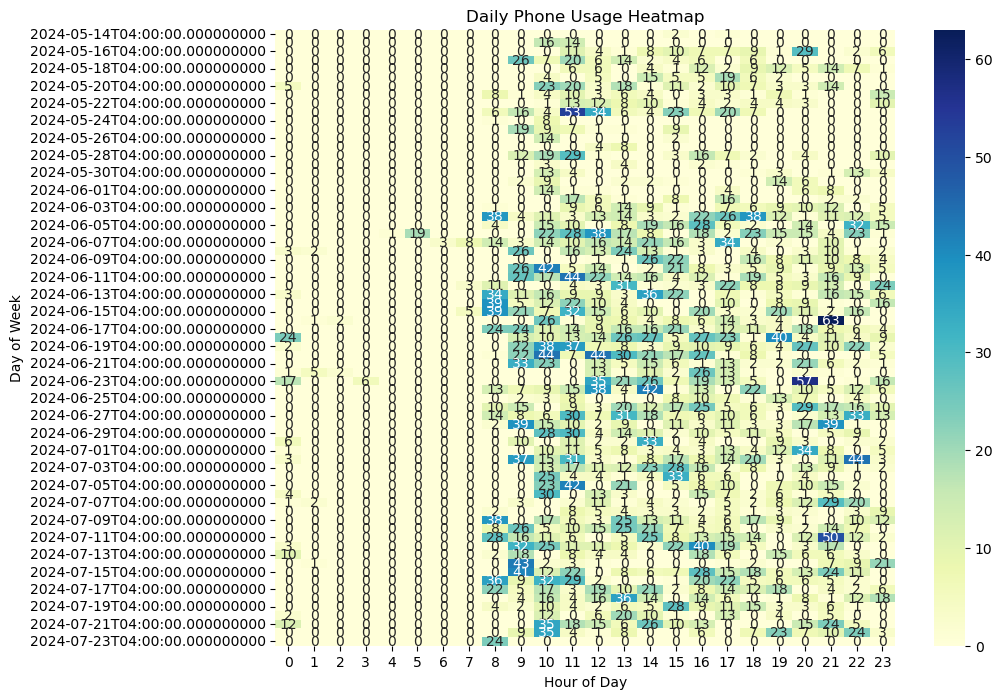

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="g")
plt.title('Daily Phone Usage Heatmap')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.show()


# Random

In [3]:
import pandas as pd

In [4]:
1717525113372 / 1000

1717525113.372

In [5]:
j = pd.to_datetime(1717525113.372, unit='s', utc=True)
# df['datetime_local'] = df['datetime_utc'].apply(lambda x: x.replace(tzinfo=video_timezone).astimezone(local_timezone))

In [6]:
j

Timestamp('2024-06-04 18:18:33.371999979+0000', tz='UTC')